In [1]:
# Read Data
import pandas as pd
f = open('/home/tampd/Downloads/cheatView1207.txt', 'r')
RowDatas = f.read().split('\n')
RawDatas = []
for RowData in RowDatas:
    RawDatas.append(RowData.split('\t'))
Datas = pd.DataFrame(RawDatas, columns = ['Time', 'UserName', 'VisitorID', 'ListenTime', 'TimeBetween'
                                          ,'MediaID', 'IP'])
Datas = Datas[:-1]
f.close()

In [2]:
# Reprocess Data
Datas['ListenTime'][Datas['ListenTime'] == ''] = '0'
Datas['TimeBetween'][Datas['TimeBetween'] == ''] = '0'
Datas[['ListenTime', 'TimeBetween']] = Datas[['ListenTime', 'TimeBetween']].astype(float)

-Thuộc tính 'Time' thuộc thang đo khoảng: Unique, Mode, Mean, Frequency ,25%, 50%, 75%, 90%, 95%, 99%, Variance, Standard Error.

-Thuộc tính 'UserName' thuộc thang đo định danh: Unique, Mode, Frequency.

-Thuộc tính 'VistorID' thuộc thang đo định danh: Unique, Mode, Frequency.

-Thuộc tính 'ListenTime' thuộc thang đo tỉ lệ: Mode, Mean, 25%, 50%, 75%, 90%, 95%, 99%, Variance, Standard Error.

-Thuộc tính 'MediaID' thuộc thang đo định danh: Unique, Mode, Frequency.

In [3]:
# Exchange 'Time' Property
import numpy as np
temps = np.array(Datas['Time'][:])
for idx, temp in enumerate(temps):
    temps[idx] = float((((temp.split(' '))[1]).split(':'))[0]) 
Datas['Time'] = pd.Series(temps)

In [4]:
# 'Time' Property

# Before Denoise
print '------------------------------------------------------------------------'
print Datas['Time'].describe()
# Mean
print 'Mean:\t' + str(Datas['Time'].mean())
# Variance
print 'Variance:\t' + str(Datas['Time'].var())
# Standard Deviation
print 'Standard Deviation:\t' + str(Datas['Time'].std())
# 25%
print '25%:\t' + str(Datas['Time'].quantile(0.25))
# 50%
print '50%:\t' + str(Datas['Time'].quantile(0.5))
# 75%
print '75%:\t' + str(Datas['Time'].quantile(0.75))
# 90%
print '90%:\t' + str(Datas['Time'].quantile(0.9))
# 95%
print '95%:\t' + str(Datas['Time'].quantile(0.95))
# 99%
print '99%:\t' + str(Datas['Time'].quantile(0.99))

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas['Time'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count     7330150.0
unique         24.0
top            15.0
freq       547241.0
Name: Time, dtype: float64
Mean:	14.2988113477
Variance:	27.3523779589
Standard Deviation:	5.22995009144
25%:	11.0
50%:	15.0
75%:	18.0
90%:	21.0
95%:	22.0
99%:	23.0
------------------------FREQUENCY------------------------
15.0    547241
16.0    531018
14.0    503615
13.0    478249
10.0    472892
11.0    466144
17.0    459119
20.0    447635
12.0    439274
18.0    424108
19.0    405706
9.0     397662
21.0    383889
22.0    323199
8.0     255841
23.0    214304
0.0     134253
7.0     122041
1.0      84745
2.0      59600
6.0      56405
3.0      44728
5.0      40310
4.0      38172
Name: Time, dtype: int64
count        24.000000
mean     305422.916667
std      185070.884570
min       38172.000000
25%      112717.000000
50%      390775.500000
75%      460875.250000
max      547241.000000
Name: Time, dtype: float64
90%: 496005.2
95%: 526907.55

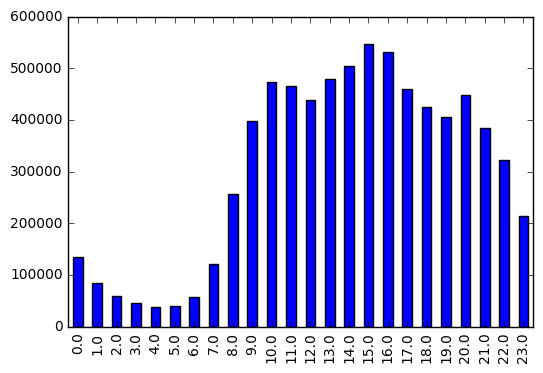

In [5]:
import matplotlib.pyplot as plt
((Datas['Time'].value_counts()).sort_index()).plot.bar()
plt.show()

Median = 15, 15h có lượng nghe nhiều nhất

Mean = 14.3 < 15 = Median phân phối lệch trái ít về 7h - 0h 

Đúng với thực tế người nghe nhạc sẽ tập trung nhiều vào khoảng 8h - 23h và tập trung ít ở khoảng 0h - 7h. Không có nghi ngờ về thuộc tính cho bài toán.

In [6]:
# 'UserName' Property

print '--------------------------------o----------------------------------------'
print Datas['UserName'].describe()

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas['UserName'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

--------------------------------o----------------------------------------
count     7330150
unique      28746
top              
freq      7048100
Name: UserName, dtype: object
------------------------FREQUENCY------------------------
                       7048100
ktinguyen777              1366
zid.httx2008               766
mai_phuong1990             403
applifemobi                343
aclon10611                 324
jimmysscentaur             284
phanlinh_cvp               250
love_of_death_devil        234
Truongngan0910             204
jeongjeong                 201
petspa                     198
thanhcr7cr9                194
pjnpjn_motmj_703           186
kurei267                   183
tryonyoulive3              183
duyh3t1                    181
popup10                    177
trung5aqt1                 170
doilavay110                170
mino0ne                    166
icequeen199                164
bumbastic                  164
hai.bt                     162
nguyenhoanglongpk     

Có một phần tử rỗng (user không đăng nhập) có tần số xuất hiện cao so với dữ liệu chung => Nhiễu (noise). Khử nhiễu (denoise) bằng cách bỏ không thống kê những phần tử rỗng.

In [7]:
# 'UserName' Property
# 'Denoise'
print '------------------------------------------------------------------------'
print Datas['UserName'][Datas['UserName'] != ''].describe()

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas['UserName'][Datas['UserName'] != ''].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count           282050
unique           28745
top       ktinguyen777
freq              1366
Name: UserName, dtype: object
------------------------FREQUENCY------------------------
ktinguyen777            1366
zid.httx2008             766
mai_phuong1990           403
applifemobi              343
aclon10611               324
jimmysscentaur           284
phanlinh_cvp             250
love_of_death_devil      234
Truongngan0910           204
jeongjeong               201
petspa                   198
thanhcr7cr9              194
pjnpjn_motmj_703         186
kurei267                 183
tryonyoulive3            183
duyh3t1                  181
popup10                  177
trung5aqt1               170
doilavay110              170
mino0ne                  166
bumbastic                164
icequeen199              164
hai.bt                   162
thuyvyls02               161
nguyenhoanglongpk        161
red205                

/usr/local/lib/python2.7/dist-packages/pandas/core/internals.py:252: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.values[slicer]
/usr/local/lib/python2.7/dist-packages/pandas/indexes/base.py:1428: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return promote(getitem(key))


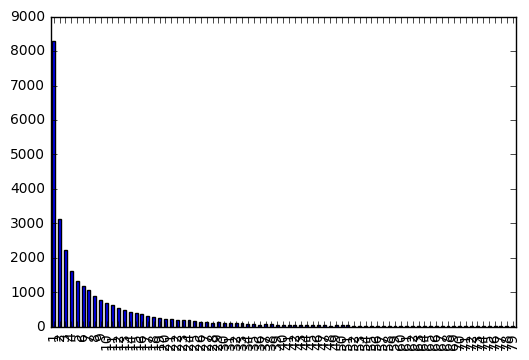

In [8]:
import matplotlib.pyplot as plt
(((Datas['UserName'].value_counts()).value_counts()).sort_index())[:(Datas['UserName'].value_counts()).quantile(0.99),].plot.bar()
plt.show()

Mode là phần tử 'ktinguyen777' có tần số xuất hiện là 1366.

Xét đến tần số xuất hiện của UserName:
- 25%: 1, 50%: 4, 75%: 11, 90%: 24.0, 95%: 38.0, 99%: 79.0
- max: 1366
- mean = 9.8 > 4 = median

Ta thấy 99%: 79 mà max: 1366 và mean > median và biểu đồ ở trên thì phân phối lệch phải bởi một số UserName (1%) có tần số lớn.
Nghi ngờ: Một số UserName (1%) có tần số lớn làm lệch phân phối.

In [9]:
# 'VisitorID' Property

print '------------------------------------------------------------------------'
print Datas['VisitorID'].describe()

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas['VisitorID'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count                                              7330150
unique                                              551273
top       2000.950e41b3995a7004294b.1480723046568.08827304
freq                                                  2820
Name: VisitorID, dtype: object
------------------------FREQUENCY------------------------
2000.950e41b3995a7004294b.1480723046568.08827304    2820
2000.28cc2c1dd2fd3ba362ec.1479732852895.416a8e72    2109
2000.4632fb4e652d8c73d53c.1428632301775.cb174923    1880
2000.88d902f6fc15154b4c04.1479900113410.c766d81b    1658
2000.c6d65f50b35e5a00034f.1444575680418.d0cc40bb    1410
2000.c22818d3f2391b674228.1481081816474.f7c1e4ce    1383
2000.541fbbde111cf842a10d.1470229105445.382da963    1366
2000.1eadcae21efbf7a5aeea.1452183291417.5561c780    1359
2000.8e0f8a3049e0a0bef9f1.1476058996337.15e07269    1308
2000.864c03428b9762c93b86.1474014574509.110d2aa7    1264
2000.c08a92e0acc1459f1cd0.145577

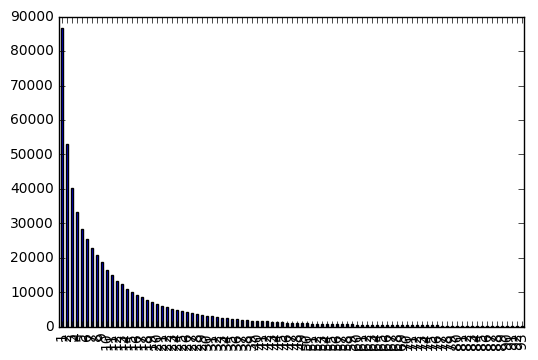

In [10]:
import matplotlib.pyplot as plt
(((Datas['VisitorID'].value_counts()).value_counts()).sort_index())[:(Datas['VisitorID'].value_counts()).quantile(0.99),].plot.bar()
plt.show()

Mode là phần tử '2000.950e41b3995a7004294b.1480723046568.08827304' có tần số xuất hiện là 2820.

Xét đến tần số xuất hiện của VisitorID:
- 25%: 2, 50%: 7, 75%: 16, 90%: 32, 95%: 47, 99%: 93
- max: 2820
- mean = 13.3 > 7 = median

Ta thấy 99%: 93 mà max: 2820 và mean > median và biểu đồ trên thì phân phối lệch phải bởi một số VisitorID (1%) có tần số lớn.
Cheat: Một số VisitorID (1%) có tần số lớn làm lệch phân phối.

In [11]:
# 'MediaID' Property

# Before Denoise
print '------------------------------------------------------------------------'
print Datas['MediaID'].describe()

# Frequency
print '------------------------FREQUENCY------------------------'
temp = Datas['MediaID'].value_counts()
print temp
print temp.describe()
print '90%: ' + str(temp.quantile(0.9))
print '95%: ' + str(temp.quantile(0.95))
print '99%: ' + str(temp.quantile(0.99))

------------------------------------------------------------------------
count        7330150
unique        106517
top       1075771528
freq          499286
Name: MediaID, dtype: object
------------------------FREQUENCY------------------------
1075771528    499286
1075791766    280690
1075794054    211553
1075793052    198952
1075772551    180833
1075794399    159455
1075771982    122015
1075758987     72397
1075782997     71611
1075792292     70711
1075757848     63561
1075752246     58828
1075785257     54585
6282518        49595
1075751008     43786
1075784817     42584
1075771983     41706
1075758867     39788
1075465009     33073
1074425097     31916
1075550468     30920
1075794564     28606
1075796111     27823
1075755756     26508
1075749994     25913
1075552481     25051
1075796186     22273
1075765293     21551
1075752472     21029
1075455731     19015
               ...  
3423414            1
902688             1
5902812            1
5877278            1
2018764            1


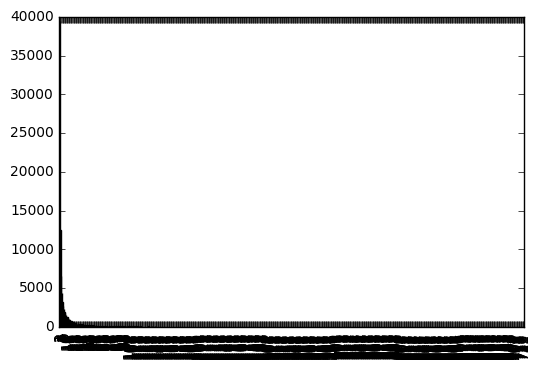

In [12]:
import matplotlib.pyplot as plt
(((Datas['MediaID'].value_counts()).value_counts()).sort_index())[:(Datas['MediaID'].value_counts()).quantile(0.99),].plot.bar()
plt.show()

Mode là phần tử '1075771528' có tần số xuất hiện là 499286.

Xét đến tần số xuất hiện của MediaID:
- 25%: 1, 50%: 3, 75%: 13, 90%: 52, 95%: 113, 99%: 675.84
- max: 499286
- mean = 68.8 > 3 = median

Ta thấy 99%: 675.84 mà max: 499286 và mean > median và biểu đồ trên thì phân phối lệch phải bởi một số MediaID (1%) có tần số lớn.
Cheat: Một số MediaID (1%) có tần số lớn làm lệch phân phối.

In [13]:
# 'ListenTime' Property

# Before Denoise
print '------------------------------------------------------------------------'
# Mode
print 'Mode:\t' + str(Datas['ListenTime'].mode()/1000)
# Mean, 25%, 50%, 75%
print Datas['ListenTime'].describe()
# 90%
print '90%:\t' + str(Datas['ListenTime'].quantile(0.9)/1000)
# 95%
print '95%:\t' + str(Datas['ListenTime'].quantile(0.95)/1000)
# 99%
print '99%:\t' + str(Datas['ListenTime'].quantile(0.99)/1000)

# Variance
print 'Variance:\t' + str(Datas['ListenTime'].var()/1000)
# Skewness
print 'Skewness:\t' + str(Datas['ListenTime'].skew())
# Kurtosis
print 'Kurtosis:\t' + str(Datas['ListenTime'].kurt())

------------------------------------------------------------------------
Mode:	0    270.0
dtype: float64
count    7.330150e+06
mean     2.681830e+05
std      2.274106e+06
min      3.000000e+04
25%      1.550000e+05
50%      2.200000e+05
75%      2.700000e+05
max      1.093945e+09
Name: ListenTime, dtype: float64
90%:	315.0
95%:	335.0
99%:	635.0
Variance:	5171559736.76
Skewness:	128.299082071
Kurtosis:	27306.150707


Skewness > 0 phân phối lệch phải.

25%: 155, 50%: 220, 75%: 270, 90%: 315, 95%: 335, 99%: 635 và max: 1093945 gía trị max lệch lớn so với 99%.

Mô hình phân phối tập trung chủ yếu ở mean: 268 và phân bố với std: 2274.

Cheat: Một số TimeListen có gía trị lớn xuất hiện làm lệch phân phối. 